<a href="https://colab.research.google.com/github/vigalpha/NBA/blob/main/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: NBA Rookie Career Longevity Prediction
**Dataset**: nba_logreg.csv

**Task**: Classification Model

**Objective**: Predict whether NBA rookies will have a career longevity of 5 years or more.

**Target Variable**:

*   y = 0 if career years played < 5
*   y = 1 if career years played ≥ 5

**About the Data**

The dataset contains player statistics for NBA Rookies. There are 1000+ observations in the dataset with 19 variables excluding the target variable(i.e. target).

**Data Description**

The values in the dataset represent average performance metrics per game over a certain period, typically throughout a season. These averages provide a standardised way to compare players' performances regardless of the number of games they played.



*   GP: Games Played
*   MIN: Minute Played

*   PTS: Number of point by game
*   FGM: Field goals made

*   FGA: Field Goals Attempts
*   FG%: Field Goals percents


*   3P made: 3 Point Made

*   3PA: 3-Point Field Goals Made

*   3P%: 3-Point Field Goals Percentage

*   FTM: Free Throws Made
*   FTA: Free Throws Attempted


*   FT%: Free Throw Percentage


*   OREB: Offensive Rebounds


*   DREB: Defensive Rebounds


*   REB: Total Rebounds

*   AST: Assists

*   STL: Steals

*   BLK: Blocks

*   TOV: Turnovers
*   TARGET_5Yrs: Target Variable


In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 1. Importing Libraries and Dataset


**Importing Libraries**

In [8]:
# Manuplation Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#sklearn Libraries
# 1. Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer

# 2. Model selection Libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV

# 3. Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 3.1 EMsemble Model for clasification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# 4. Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix

# 5. Statistic Libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats.mstats import winsorize


# 5. Use for Visual and Function
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')



**Loading dataset**


In [10]:
# fucntion for loading the dataset
def load_data(path):
  return pd.read_csv(path)

In [11]:
data = load_data('/content/drive/MyDrive/NBA_AML/nba_logreg.csv')

**Exploratory Data Analysis(EDA)**

**1.Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.**

In [12]:
data.head(2)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,NaN,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35.0,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0


In [13]:
data.tail(2)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1338,Litterial Green,52.0,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47.0,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1331 non-null   float64
 2   MIN          1336 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1336 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1337 non-null   float64
 17  STL          1337 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [15]:
def beda_df(df):
  print("Shapes of the Dataset".center(50,'-'))
  print('Observations ------------------->{}'.format(df.shape[0]))
  print('Features of dataset------------->{}'.format(df.shape[1]))
  print("Row and Colunms of the dataset-->{}".format(df.shape))
  print("Features Details".center(50,'-'))
  print("Features Type")
  print(df.dtypes)
  print("----------------------------------------------------")
  print("Catagorical Type")
  print(df.select_dtypes(include=['object']).columns)
  print("Size --------->",(len(df.select_dtypes(include=['object']).columns)))
  print("----------------------------------------------------")
  print("Numerical Type")
  print(df.select_dtypes(exclude = ['object']).columns)
  print("Size ---------->",(len(df.select_dtypes(exclude = ['object']).columns)))
  print(' Duplicate Values Analysis'.center(50,'-'))
  print(df.duplicated())
  print("Count ---------->", df.duplicated().sum())


beda_df(data)

--------------Shapes of the Dataset---------------
Observations ------------------->1340
Features of dataset------------->21
Row and Colunms of the dataset-->(1340, 21)
-----------------Features Details-----------------
Features Type
Name            object
GP             float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs      int64
dtype: object
----------------------------------------------------
Catagorical Type
Index(['Name'], dtype='object')
Size ---------> 1
----------------------------------------------------
Numerical Type
Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
 

In [16]:
duplicate_in_Name_columns = data[data.duplicated(subset=['Name'],keep = False)]
print(duplicate_in_Name_columns)

                  Name    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
18       Larry Johnson  82.0  37.2  19.2  7.5  15.3  49.0      0.1  0.3  22.7   
19       Larry Johnson  82.0  37.2  19.2  7.5  15.3  49.0      0.1  0.3  22.7   
71           Dee Brown  82.0  23.7   8.7  3.5   7.5  46.4      0.1  0.4  20.6   
72           Dee Brown  82.0  23.7   8.7  3.5   7.5  46.4      0.1  0.4  20.6   
73           Dee Brown  49.0   9.2   1.9  0.7   2.0  32.7      0.1  0.6  21.4   
...                ...   ...   ...   ...  ...   ...   ...      ...  ...   ...   
1127  Cedric Henderson  82.0  30.8  10.1  4.2   8.8  48.0      0.0  0.0   0.0   
1229    Glenn Robinson  80.0  37.0  21.9  8.0  17.6  45.1      1.1  3.4  32.1   
1230    Glenn Robinson  80.0  37.0  21.9  8.0  17.6  45.1      1.1  3.4  32.1   
1334       Chris Smith  80.0  15.8   4.3  1.6   3.6  43.3      0.0  0.2  14.3   
1335       Chris Smith  80.0  15.8   4.3  1.6   3.6  43.3      0.0  0.2  14.3   

      ...  FTA   FT%  OREB 

Find Duplicate Name entries in Dataset


In [17]:
duplicate_name_count = data.duplicated(subset=['Name']).sum()
print("Count of Duplicate Names:", duplicate_name_count)


Count of Duplicate Names: 46


**Checking the Missing Value**

In [18]:
pd.DataFrame(data.isna().sum(), columns =['Missing_Valve'])

,Missing_Valve
Name,0
GP,9
MIN,4
PTS,0
FGM,0
FGA,0
FG%,0
3P Made,0
3PA,0
3P%,11


We found many missing value in dataset

In [19]:
# Finding the Uniqueness Values

def unique(df):
  unique_value = []
  for col in df.columns:
    unique_value.append(len(df[col].unique()))
    unique_dic = {"unique_value":unique_value}
  return pd.DataFrame(unique_dic, index = df.columns)

unique(data)

,unique_value
Name,1294
GP,71
MIN,326
PTS,191
FGM,87
FGA,159
FG%,284
3P Made,23
3PA,54
3P%,255


**Unique Value:**
  It might not make sense to take a unique Value on continuous variables, But We can conclude Players have some identical characteristics that belong to each other while performing in match.

* **High Three-Point Shooting:** Elevated three-point shooting percentages among top unique values suggest players with advanced skills or experience, as hitting three-pointers consistently requires precision and expertise.

* **Free Throw Percentage Observation:** High free throw percentages indicate player aggressiveness and confidence in attacking the basket during gameplay, showcasing their ability to draw fouls and convert free throws effectively.

* **Points Scored Analysis:** Varied points scored distributions reflect diverse team strategies, tactics, and game tempo, with higher scoring players potentially leading offensive efforts or capitalizing on team dynamics and playstyles.

* **Field Goal Percentage (FG%):** Diverse FG% values suggest varying shooting accuracies among players, impacting scoring efficiency and team performance.



#    Using pyplot-style coding

**Parameter fixing for Visualization**


Defining the number of bins for a histogram is an important aspect of visualizing data distribution. The number of bins determines how the data is divided into intervals or "bins" along the x-axis of the histogram. Too few bins may oversimplify the distribution and hide important details, while too many bins may introduce noise and make it difficult to interpret the plot.


*Using Scott's Method:*  
  Calculate the number of bins using Scott's method, which considers the size of the dataset and its standard deviation. It is more robust than Sturges' formula and performs well for various distributions.

In [20]:
def cal_bin(df):
  #selected Columns
  numerical_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV','TARGET_5Yrs']
  # Creating Distionary Empty Bin_value variable for final value
  bin_value = {}
  for column in numerical_columns:
    bin_width = 3.5 * np.std(df[column]) / (len(df[column]) ** (1/3))
    num_bin = (df[column].max() - df[column].min()) / bin_width
    bin_value[column] = num_bin
  # Above create function gives us bin_value each selected colunms, so we trying to summerize the bin_value
  mean_bin = round(np.mean(list(bin_value.values())))
  print(f"Mean bins: {mean_bin}")

cal_bin(data)

Mean bins: 20


**Data Distribution**

Normality Check for Dataset

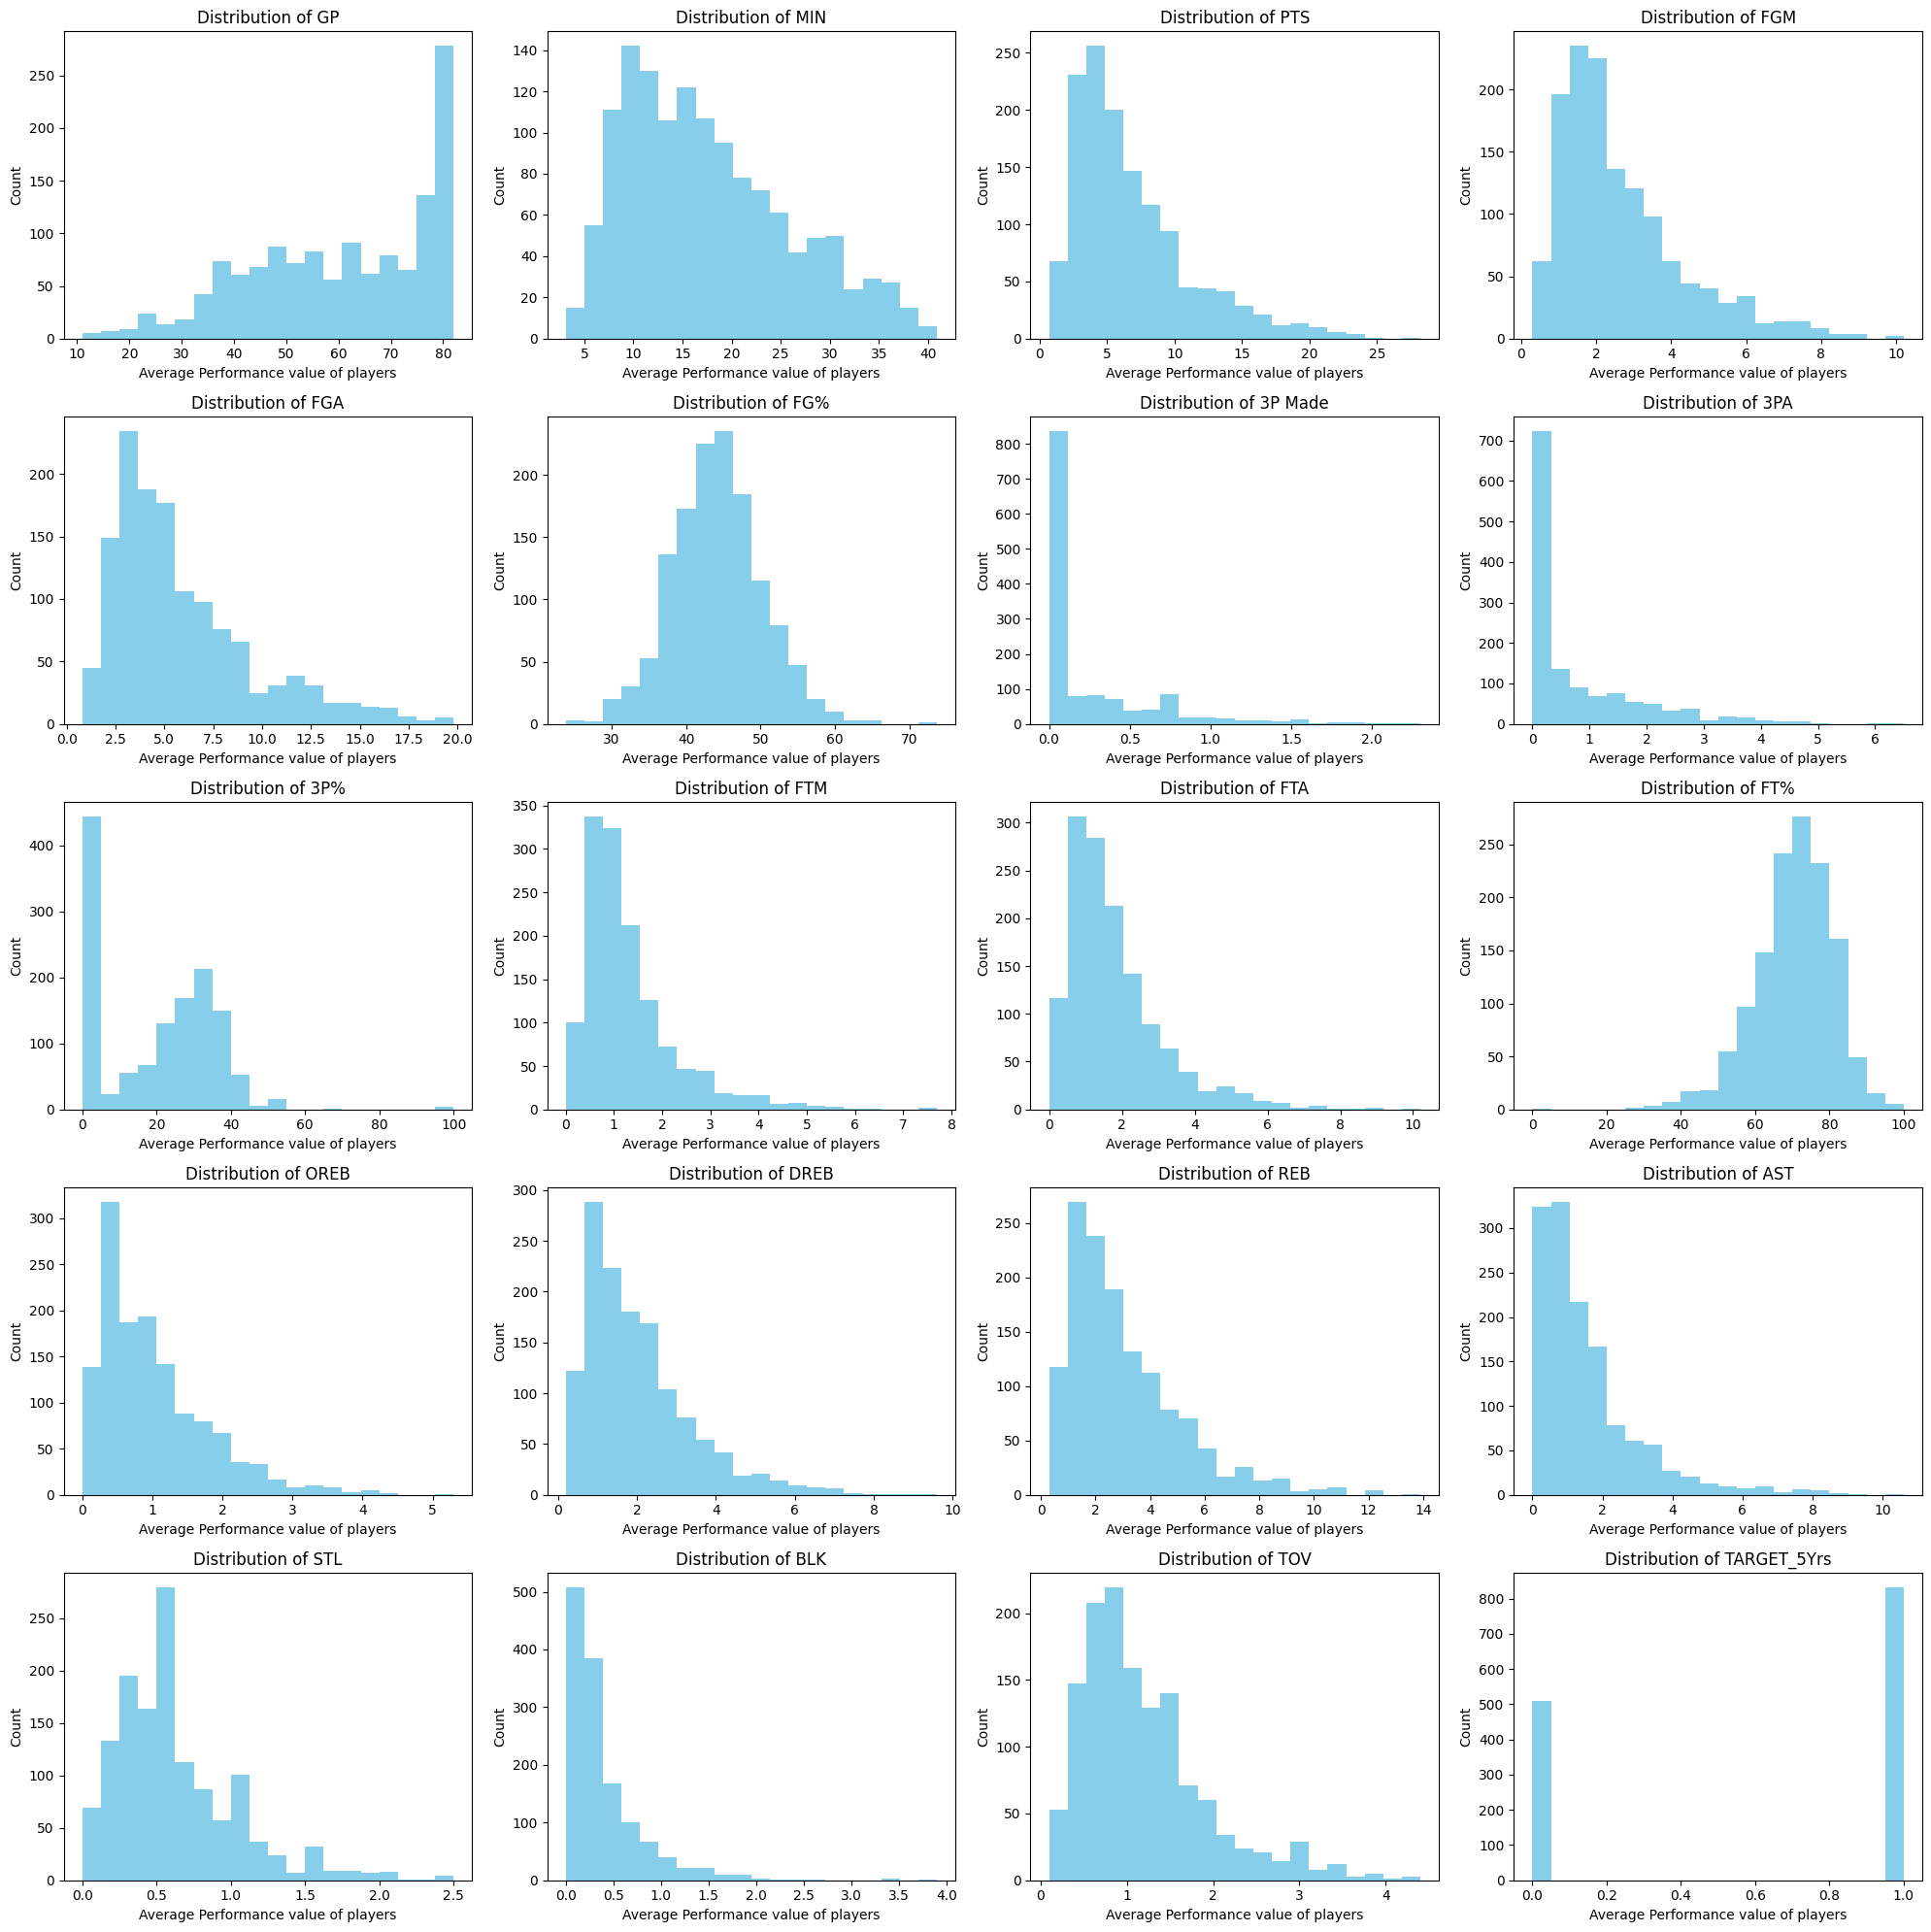

In [21]:
def visualize_distribution(df):
    # Selecting the Numberical columns
    numerical_columns = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV','TARGET_5Yrs']

    #Set up subplot(i want to see all columns in single layout)
    fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20))

    # Set up the array in 1d format to iterate easily using flatten() funtion form numpy
    axes = axes.flatten()

    #plot the histrogram for selected columns in dataset using for loop
    for i,column in enumerate(numerical_columns):
        #axes 1D array in Histrogram, bin = intervel, alpha is transparency of the bar
        axes[i].hist(df[column].dropna(), bins=20, color='skyblue', alpha=1)
        axes[i].set_xlabel('Average Performance value of players', fontsize = 10)
        axes[i].set_ylabel('Count', fontsize = 10)
        axes[i].set_title(f'Distribution of {column}', fontsize = 12)

    plt.tight_layout()
    plt.show()

visualize_distribution(data)




<Figure size 640x480 with 0 Axes>

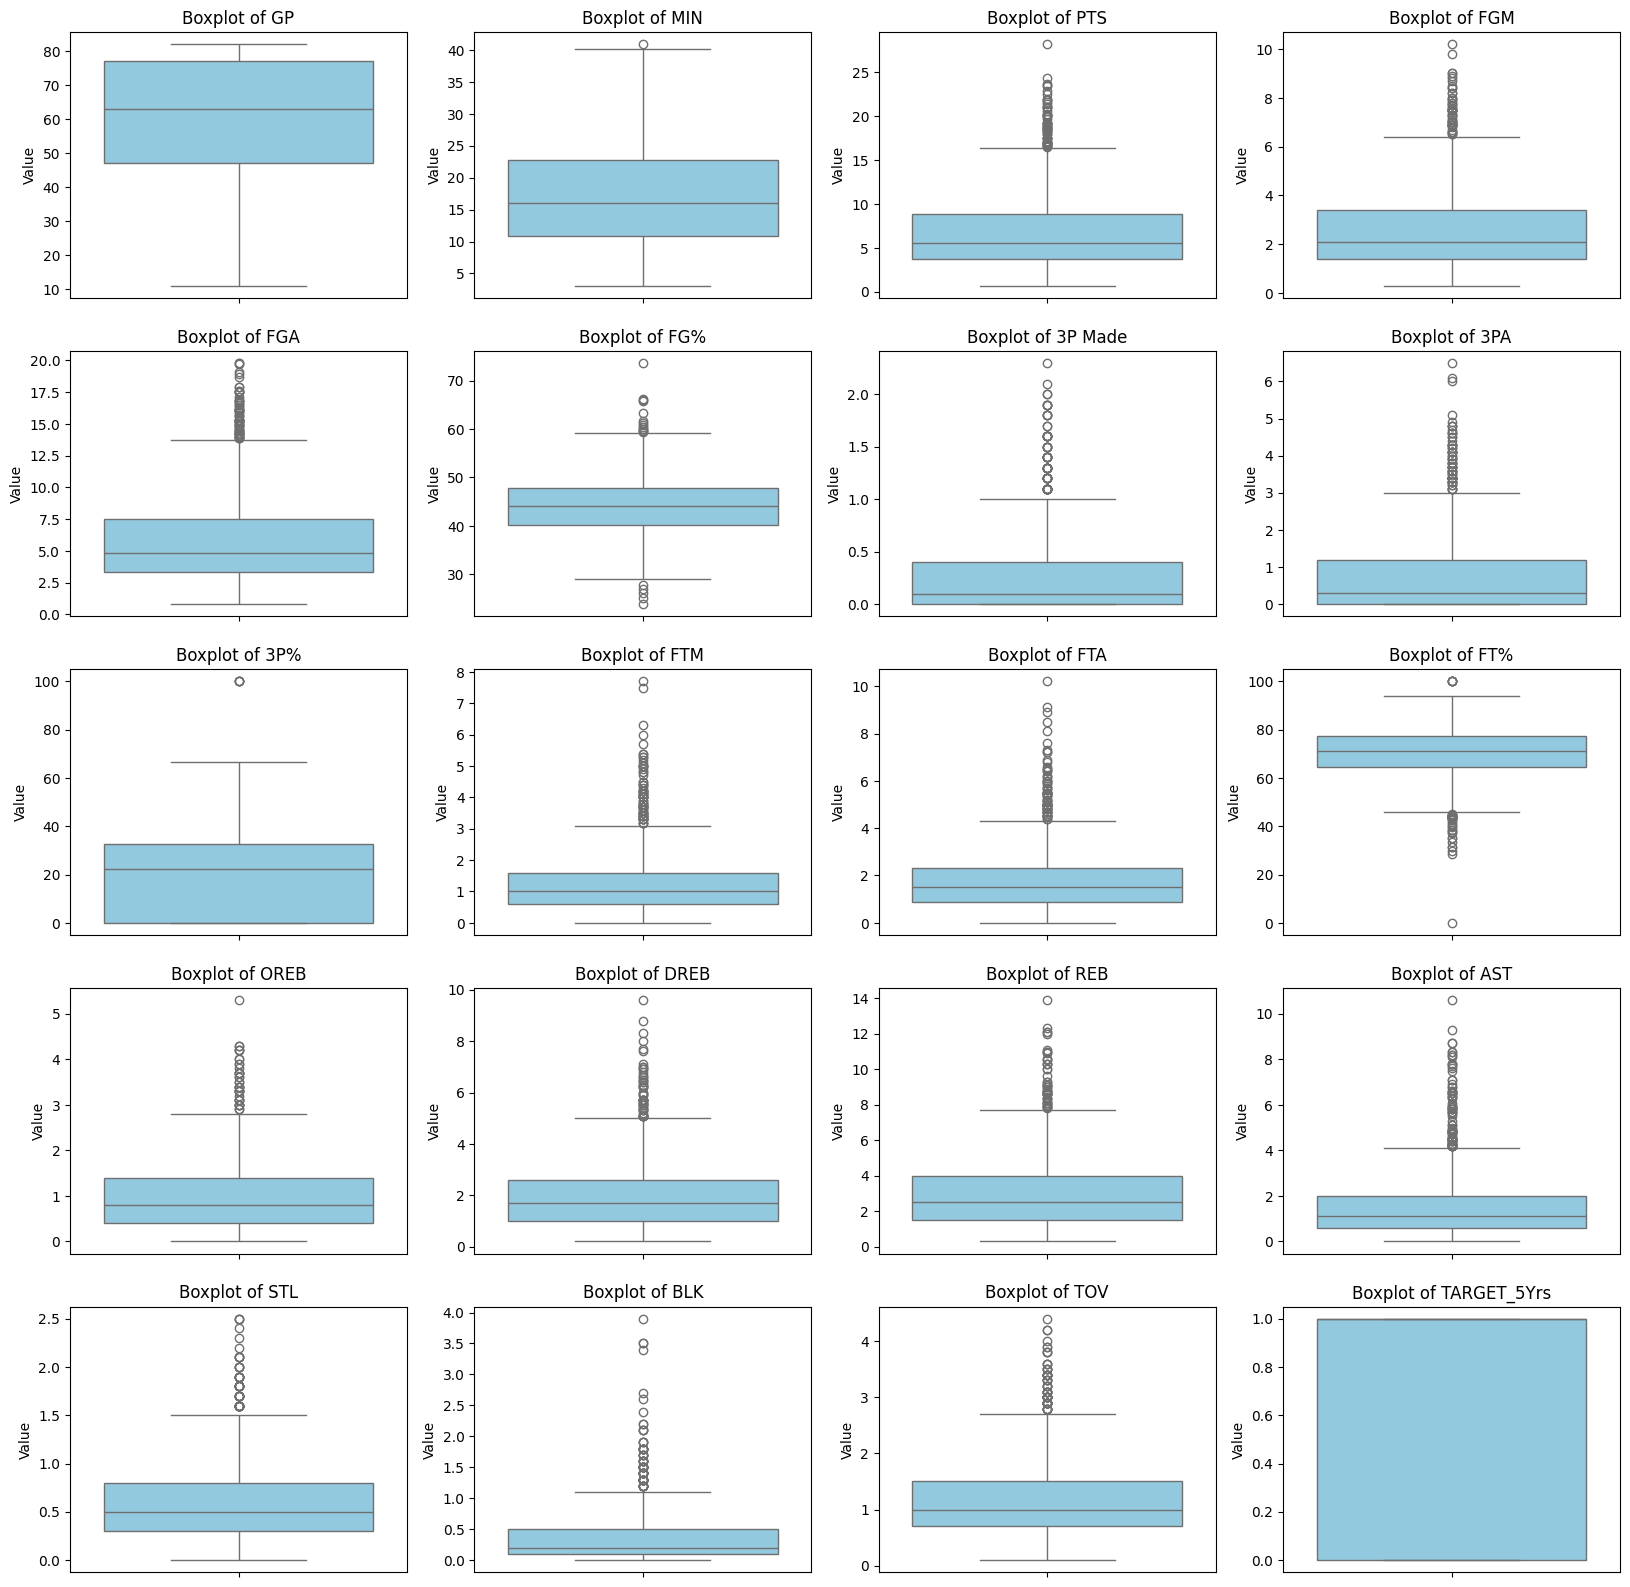

In [22]:
def outlier_f(df):
  numerical_columns = ['GP','MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV','TARGET_5Yrs']

  fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20))
  axes =axes.flatten()

  for i,column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=10)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()
outlier_f(data)


**Linearity Check**

In [ ]:
def linearity_check(df):
  numerical_columns = ['GP','MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV','TARGET_5Yrs']
  sns.pairplot(df[numerical_columns])
  plt.show()

linearity_check(data)



**2. Comment on class imbalance with appropriate visualization method.**

In [ ]:
def feature_selecetion(df):
  # Identifing the Target variable.
  Feature = df.columns[ :-1]
  Target = df.columns[-1]
  print("----------------------------------------------------")
  print("\nFeature:")
  print(Feature)
  print("----------------------------------------------------")
  print("\nTarget:")
  print(Target)
feature_selecetion(data)


In [ ]:

# Class distribution plot for the 'TARGET_5Yrs' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET_5Yrs', data=data, palette='Set1')
plt.title('Class Distribution of TARGET_5Yrs')
plt.xlabel('TARGET_5Yrs')
plt.ylabel('Count')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data.TARGET_5Yrs)
plt.ylabel('Count_Target')
plt.title("Target Variable Distribution")
plt.show()

The result of the Histogram plot and count plot shows the target variable(TARGET_5Yrs) distribution.



**3. Provide appropriate visualizations to get an insight about the dataset.**

**Descriptive Analysis**


In [ ]:
def describe_plot(df):
  describe = df.describe().T
  plt.figure(figsize = (16,12))
  sns.heatmap(describe,
              annot = True, # Value appears in each cell
              annot_kws= {"size": 15},
              cmap = 'Blues', # Gives the colors to each cell
              fmt=".2f", # Gives the decimal value to each cell
              linecolor = 'Black',
              linewidths= 1,
              cbar = False)
  plt.title("Descriptive Statistics for Dataset", fontsize = 20)
  plt.show()

describe_plot(data)

**Results of Descriptive Statistic using Heatmap**



*   Count: Indicates the number of non-null values for each feature.
*   GP represents the number of games played, and we can see that the standard deviation amount is high compared to other variables. Some players have played a lot of games while others have played less, and for a player to play a lot of games means that his career year is more.







**4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.**

**Correlation Analysis before Pre-processing**

**Assumption**

* The Variables must be linear
* Normally Distributed
* No significant Outliers
* Non-Missing Values on Variables

In [ ]:
def correlation_coefficient(df):
    numerical_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']
    correlation_matrix = df[numerical_columns].corr()

    # Print the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

# Call the function
correlation_coefficient(data)


Yes, the correlational analysis will influence feature selection. Features with high correlations with the target variable or with each other may be prioritized or excluded during feature selection to improve model performance and reduce redundancy.

In [ ]:
def correlation_coefficients(df):
    numerical_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']
    # Correlation between different variables
    corr = df[numerical_columns].corr()
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(12, 10))
    # Generate a mask for upper traingle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)
    plt.show()

# Example usage:
correlation_coefficients(data)


**The correlation matrix** shows how different aspects of basketball player statistics relate to each other and to whether a player stays in the league for five years (TARGET_5Yrs). Here's how it affects feature selection:

* Identifying Important Stats: If certain stats, like points scored (PTS) or field goals made (FGM), are strongly linked to a player's longevity in the league, we'll focus more on those stats when building our model.

* Avoiding Redundant Information or Detecting Multicollinearity: Some stats might be very similar to each other, like minutes played (MIN) and points scored (PTS). If they're highly correlated, we might only need to include one of them in our model to avoid repeating the same information.

* Ranking Features: The correlation matrix helps us rank which stats are most important. For example, if assists (AST) have a higher correlation with staying in the league than steals (STL), we'll prioritize assists in our analysis.

In [ ]:
def variable_variances(df):
    return pd.DataFrame(df.var() , columns=['feature_variance'])
variable_variances(data).sort_values(by = 'feature_variance')

 When we look at the variance values, there are variables with very high variance, so we will need to scale up.

High variance features like GP, MIN, PTS, FGA, FG%, FT%, 3P%, FTM, 3PA, FTA, DREB, AST, FGM, and REB display wide value ranges, suggesting significant data spread. Conversely, low variance features such as 3P Made, STL, BLK, and TARGET_5Yrs have more concentrated values around the mean. Features with high variance may play

variance, so we will need to scale up.

# Data Sanity Check Report
* We found Missing Values in multiple Variables or Attributes.
* We found a Duplicate row in the dataset and we addressed the Duplicate value in the name column (total observation 1331 but the unique value is 1294)
* We found Outliers in most of the Variable
* Multiple kinds of Distribution or Skewed Data across the dataset
* We found non-linear and non-normally distributed data.
* When we look at the variance values, There are variables with very high variance, So we will need to scale up.

# Data Pre-processing and Cleaning

In [ ]:
def imputering(df):
    numerical_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']
    imputer = SimpleImputer(strategy='median')
    data_imputed = imputer.fit_transform(df[numerical_columns])
    data_imputed = pd.DataFrame(data_imputed, columns=numerical_columns)
    return data_imputed

imputed_data = imputering(data)
imputed_data.isnull().sum()


In [ ]:
lower_limit = 0.05
upper_litmit = 0.95
numerical_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%',
                     'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']
for column in numerical_columns:
  data[column] = winsorize(data[column], limits = (lower_limit, upper_litmit))

In [ ]:
def visualize_distribution(df):
    # Selecting the Numberical columns
    numerical_columns = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV','TARGET_5Yrs']

    #Set up subplot(i want to see all columns in single layout)
    fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20))

    # Set up the array in 1d format to iterate easily using flatten() funtion form numpy
    axes = axes.flatten()

    #plot the histrogram for selected columns in dataset using for loop
    for i,column in enumerate(numerical_columns):
        #axes 1D array in Histrogram, bin = intervel, alpha is transparency of the bar
        axes[i].hist(df[column].dropna(), bins=20, color='skyblue', alpha=1)
        axes[i].set_xlabel('Average Performance value of players', fontsize = 10)
        axes[i].set_ylabel('Count', fontsize = 10)
        axes[i].set_title(f'Distribution of {column}', fontsize = 12)

    plt.tight_layout()
    plt.show()

visualize_distribution(data)




In [ ]:
def linearity_check(df):
  numerical_columns = ['GP','MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV','TARGET_5Yrs']
  sns.pairplot(df[numerical_columns])
  plt.show()

linearity_check(data)



In [ ]:
def correlation_coefficients(df):
    numerical_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs']
    # Correlation between different variables
    corr = df[numerical_columns].corr()
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(12, 10))
    # Generate a mask for upper traingle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)
    plt.show()

# Example usage:
correlation_coefficients(data)

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
pt = PowerTransformer()  # Apply Power Transformer for handling skewness
data_transformed = pt.fit_transform(data_imputed)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')